In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc4
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

datafile = 'data/Zinser_SizeDist_calibrated-26-6.nc'

data = {}
with nc4.Dataset(datafile) as nc:
    for var in nc.variables:
        data[var] = nc.variables[var][:]

v_min = data['v_min']
delta_v = 1.0/data['delta_v_inv']
v = v_min * 2**(np.arange(data['m'])*delta_v)

def add_colorbar(ax, **cbarargs):
    axins_cbar = inset_axes(ax, width='3%', height='90%', loc=5, bbox_to_anchor=(0.05,0.0,1,1), bbox_transform=ax.transAxes)
    cb = mpl.colorbar.ColorbarBase(axins_cbar, orientation='vertical', **cbarargs)
    cb.solids.set_rasterized(True)

cmap = plt.get_cmap('coolwarm')
norm = mpl.colors.Normalize(vmin=-1, vmax=1)

## the old formulation (used in growth/respiration versions 1 & 2)

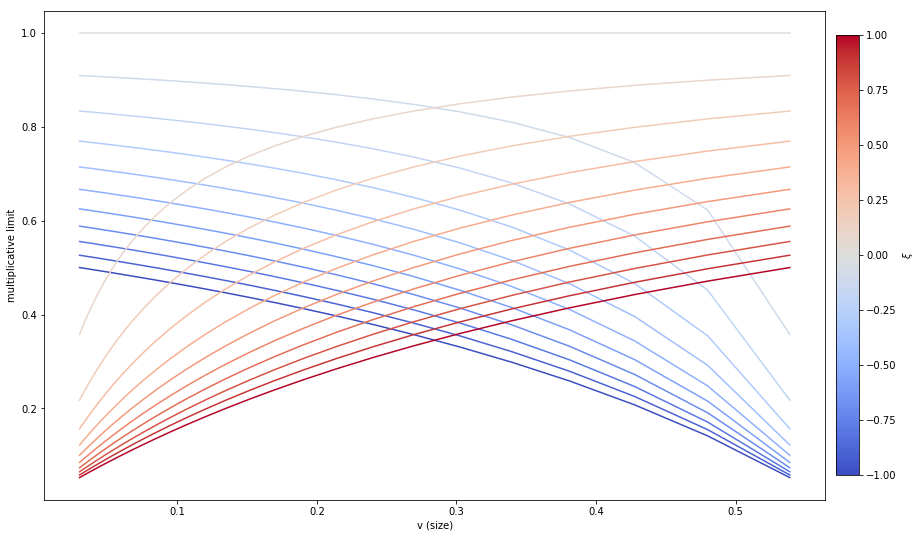

In [2]:
fig, ax = plt.subplots(figsize=(14,9))

for xi in np.linspace(-1.0,1.0,21):
    if xi > 0:
        tmp = v/v[-1]
        sizelim = tmp/(xi+tmp)
    else:
        tmp = 1.0 + (v_min-v)/v[-1]
        sizelim = tmp/(tmp-xi)
    ax.plot(v, sizelim, color=cmap(norm(xi)))
add_colorbar(ax, norm=norm, cmap=cmap, label='$\\xi$')
ax.set(xlabel='v (size)', ylabel='multiplicative limit')
None

## a "power law" formulation (used in growth/respiration versions 3, 4 & 5)

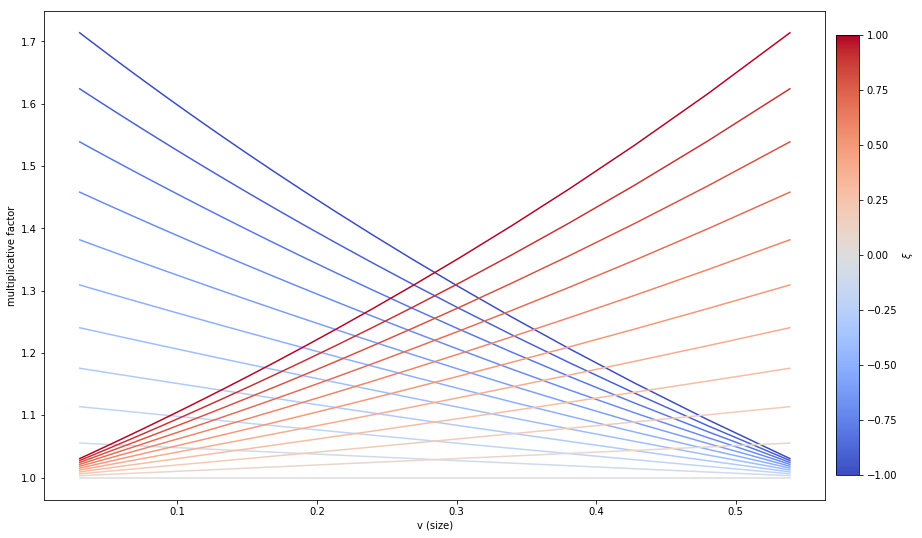

In [3]:
fig, ax = plt.subplots(figsize=(14,9))

for xi in np.linspace(-1.0,1.0,21):
    if xi > 0:
        sizelim = np.exp(xi*v)
    else:
        sizelim = np.exp(xi*(v-v[-1]-v[0]))
    ax.plot(v, sizelim, color=cmap(norm(xi)))
add_colorbar(ax, norm=norm, cmap=cmap, label='$\\xi$')
ax.set(xlabel='v (size)', ylabel='multiplicative factor')
None

## general information about the different growth/respiration versions

### size-dependent growth/respiration version 1 `respi`
growth and respiration can occur at the same time

$\gamma_i = dt \cdot s_i(\xi) \cdot \gamma_{max} \cdot \left(1-\exp\left(-\tfrac{E}{E^*}\right)\right)$

$\rho_i = dt \cdot s_i(\xi_r) \cdot \hat{\rho}$

where 

$s_i(\xi) = \begin{cases} \frac{v_i/v_m}{\xi+v_i/v_m} & \text{ for }\xi \ge 0 \\ \frac{1+(v_1-v_i)/v_m}{1+(v_1-v_i)/v_m-\xi} & \text{ otherwise}\end{cases}$

### size-dependent growth/respiration version 2 `respiv2`
$\hat{\gamma}_i = dt \cdot s_i(\xi) \cdot \left(\gamma_{max} \cdot \left(1-\exp\left(-\tfrac{E}{E^*}\right)\right) - \hat{\rho} \right)$

where 

$s_i(\xi) = \begin{cases} \frac{v_i/v_m}{\xi+v_i/v_m} & \text{ for }\xi \ge 0 \\ \frac{1+(v_1-v_i)/v_m}{1+(v_1-v_i)/v_m-\xi} & \text{ otherwise}\end{cases}$

finally determine respiration and growth based on sign of $\hat{\gamma}_i$

$\gamma_i = \begin{cases}\hat{\gamma}_i & \text{ if } \hat{\gamma}_i \ge 0 \\ 0 & \text{ otherwise}\end{cases}$ and $\rho_i = \begin{cases} 0 & \text{ if } \hat{\gamma}_i \ge 0 \\ -\hat{\gamma}_i & \text{ otherwise}\end{cases}$

### size-dependent growth/respiration version 3 `respiv3`

$\hat{\gamma}_i = dt \cdot s_i(\xi) \cdot \left(\gamma_{max} \cdot \left(1-\exp\left(-\tfrac{E}{E^*}\right)\right) - \hat{\rho} \right)$

where 

$s_i(\xi) = \begin{cases} \exp\left(\xi v_i\right) & \text{ for }\xi \ge 0 \\ \exp\left(\xi(v_i-v_1-v_m)\right) & \text{ otherwise}\end{cases}$

finally determine respiration and growth based on sign of $\hat{\gamma}_i$

$\gamma_i = \begin{cases}\hat{\gamma}_i & \text{ if } \hat{\gamma}_i \ge 0 \\ 0 & \text{ otherwise}\end{cases}$ and $\rho_i = \begin{cases} 0 & \text{ if } \hat{\gamma}_i \ge 0 \\ -\hat{\gamma}_i & \text{ otherwise}\end{cases}$

### size-dependent growth version 3 + size-independent respiration `resp_gammaiv3`
size-dependence is not added to respiration term $\hat{\rho}$

$\hat{\gamma}_i = dt \cdot \left(s_i(\xi) \cdot \gamma_{max} \cdot \left(1-\exp\left(-\tfrac{E}{E^*}\right)\right) - \hat{\rho} \right)$

where 

$s_i(\xi) = \begin{cases} \exp\left(\xi v_i\right) & \text{ for }\xi \ge 0 \\ \exp\left(\xi(v_i-v_1-v_m)\right) & \text{ otherwise}\end{cases}$

finally determine respiration and growth based on sign of $\hat{\gamma}_i$

$\gamma_i = \begin{cases}\hat{\gamma}_i & \text{ if } \hat{\gamma}_i \ge 0 \\ 0 & \text{ otherwise}\end{cases}$ and $\rho_i = \begin{cases} 0 & \text{ if } \hat{\gamma}_i \ge 0 \\ -\hat{\gamma}_i & \text{ otherwise}\end{cases}$

### size-dependent growth/respiration version 4 `respiv4`
like in version 1, growth and respiration can occur at the same time

$\gamma_i = dt \cdot s_i(\xi) \cdot \gamma_{max} \cdot \left(1-\exp\left(-\tfrac{E}{E^*}\right)\right)$

$\rho_i = dt \cdot s_i(\xi_r) \cdot \hat{\rho}$

where 

$s_i(\xi) = \begin{cases} \exp\left(\xi v_i\right) & \text{ for }\xi \ge 0 \\ \exp\left(\xi(v_i-v_1-v_m)\right) & \text{ otherwise}\end{cases}$

### size-dependent growth/respiration version 5 `respiv5`
separate exponential size relationsships for growth and respiration

$\hat{\gamma}_i = dt \cdot \left(s_i(\xi) \cdot \gamma_{max} \cdot \left(1-\exp\left(-\tfrac{E}{E^*}\right)\right) - s_i(\xi_r) \hat{\rho} \right)$

where 

$s_i(\xi) = \begin{cases} \exp\left(\xi v_i\right) & \text{ for }\xi \ge 0 \\ \exp\left(\xi(v_i-v_1-v_m)\right) & \text{ otherwise}\end{cases}$

finally determine respiration and growth based on sign of $\hat{\gamma}_i$

$\gamma_i = \begin{cases}\hat{\gamma}_i & \text{ if } \hat{\gamma}_i \ge 0 \\ 0 & \text{ otherwise}\end{cases}$ and $\rho_i = \begin{cases} 0 & \text{ if } \hat{\gamma}_i \ge 0 \\ -\hat{\gamma}_i & \text{ otherwise}\end{cases}$
